In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import nose.tools
import io
import math
from scipy import stats
from datetime import date
import seaborn as sns 

import plotly.express as px
import plotly.graph_objects as go

<h1><center> Burnout at working place </center></h1> 
<h5><center> Author: Vasil Kichukov </center></h5> 

## References <a class="anchor" id="References"></a>


1. https://www.gallup.com/workplace/357404/manager-burnout-getting-worse.aspx
2. https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-021-10670-7
3. https://www.city-journal.org/html/why-gender-gap-won%E2%80%99t-go-away-ever-13395.html
4. Leiter, M. P., Maslach, C., & Frame, K. (2015). Burnout. The Encyclopedia of Clinical Psychology, 1–7.
5. Maslach, C., Schaufeli, W. B., & Leiter, M. P. (2001). Job Burnout. Annual Review of Psychology, 52(1), 397–422.


## Abstract ##


Burnout is a prolonged response to chronic emotional and interpersonal stressors on the job and encompasses tiredness, exhaustion, and emotional drain. It is viewed mainly as an occupational phenomenon with a high cost in psychological and economic terms. As in the contemporary competitive world, companies strive toward maximum efficiency, it looks like extensive working hours and high revs are actually damaging organizational aims. Therefore the current project hopes to empower business productivity through insights into the real impact of basic job factors such as home office.

## Introduction ##

The statement “Burnout is about your workplace, not your people” raises some serious questions I hope to answer partially throughout the data. Apart from the dangerous individual consequences such as depersonalization, stress at work also results in enormous economic losses. The World Economic Forum estimates burnout’s global price at 322 billion dollars. 
Job burnout symptoms also result in lost creativity, reduced commitment to work, estrangement from various job components, physical and emotional ailments, inappropriate attitudes toward self and clients, and a general sense of exhaustion. Subsequently, with burnout levels rising, employees may unknowingly cause harm to themselves, coworkers, clients, and the organization.
The factors causing burnout are normally conceived as being individual and situational. The principal situational factors can be categorized as job characteristics, occupational characteristics, and organizational characteristics. Job characteristics linked to burnout include work overload, job demands, time pressure, role conflict, and role ambiguity. Issues of control and information are also crucial factors. People who have little participation in decision-making or have a lack of autonomy are especially likely to experience burnout. Occupational characteristics, on the other hand, include the job’s emotional demands while organizational are focused on the immediate context in which the work occurs. With the expansion of companies, it can be said that hierarchies, operating rules, resources, and space distribution can have a far-reaching and persistent influence, particularly when they violate basic expectations of fairness and equity.
Since it is an occupational phenomenon, we can say that employers and employees can both take action to prevent burnout. For instance, by rebuilding company procedures and culture, some of the antecedents, such as job overload and poor organizational fairness, can be solved.
The current project aims to gain some guidance on the influence of several factors in a corporate context on the levels of burnout and mental tiredness in employees. The aspects that will be explored include the company’s type, options for remote work, designation, and resource allocation. The key hypotheses are centralized around the following statements:
Longer working hours are associated with higher levels of both burnout and mental fatigue. 
Employees who have an option for home office tend to experience lesser levels of burnout in comparison with those who don’t have.


## Conclusion 

Happy and healthy employees are indisputably more productive at work, and in turn, help the business flourish profoundly.

However, since working from home has become the new strange normal, over 69% of employees have been showing burnout symptoms globally (source: Monster poll). This rate of burnout is indeed alarming and the likes of Google and Cisco (even HackerEarth!) are taking steps that ensure wellness and reduce burnout among employees.

This October 10th, in honor of World Mental Health Day, your business has stepped in to help its employees in effectively scheduling their work plans to avoid burnout.

## About Dataset ## 

#### Context ####

Understanding what will be the Burn Rate for the employee working in an organization based on the current pandemic situation where work from home is a boon and a bane. How are employees' Burn Rate affected based on various conditions provided?

###  Content
Globally, World Mental Health Day is celebrated on October 10 each year. The objective of this day is to raise awareness about mental health issues around the world and mobilize efforts in support of mental health. According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide. These days when the world is suffering from a pandemic situation, it becomes really hard to maintain mental fitness.

Employee ID: The unique ID allocated for each employee (example: fffe390032003000)

Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)

Gender: The gender of the employee (Male/Female)

Company Type: The type of company where the employee is working (Service/Product)

WFH Setup Available: Is the work from home facility available for the employee (Yes/No)

Designation: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.

Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.
In the range of [1.0, 10.0] (higher means more resource)

Mental Fatigue Score: The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.

Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.

### Inspiration 
Try to build some really amazing predictions keeping in mind that happy and healthy employees are indisputably more productive at work, and in turn, help the business flourish profoundly.

## 1.Reading, Tidying and Cleaning data

In [109]:
employees_data = pd.read_csv("data\employes_2008.csv")
employees_data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [110]:
employees_data.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

First column "Employee ID" looks with unique values for every single employee. Let's check if this is true.

In [111]:
len(employees_data['Employee ID'].unique()) - employees_data.shape[0]

0

OK, looks like I was right, we can make our first column an index. In fact, our columns have quite simple data, but at the same time they are represented by complex. If we are reading this dataset for the first time, it will take us a long time to understand what each one describes. Let's rename the columns with simpler and easier to understand words.

In [112]:
column_names = ["employee_id","joined","gender","company_type","home_office","designation","working_hours","fatigue","burn_rate"]
employees_data.columns = column_names
employees_data.index = employees_data["employee_id"]
employees_data.drop("employee_id", axis=1, inplace= True)
employees_data.head()

,joined,gender,company_type,home_office,designation,working_hours,fatigue,burn_rate
employee_id,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


By analyzing the "joined" column, we can determine that everyone joined in 2008. While using column as a starting point, we can make a new column that displays the number of days (starting date is Jan 1, 2008). We will suppose that a person has more experience the more days he or she has. Setting the final date to December 31, 2008. I believe a longer term having higher value.

In [113]:
to_days = pd.to_datetime(employees_data['joined'], format= '%Y-%m-%d').dt.date

last_day = date(2008,12,31)
employees_data['experience'] = last_day - to_days
employees_data['experience'] = employees_data.experience.dt.days
employees_data.insert(1, 'experience', employees_data.pop('experience'))
employees_data.drop(columns='joined', axis=1, inplace=True)
employees_data.head()

,experience,gender,company_type,home_office,designation,working_hours,fatigue,burn_rate
employee_id,,,,,,,,
fffe32003000360033003200,92,Female,Service,No,2.0,3.0,3.8,0.16
fffe3700360033003500,31,Male,Service,Yes,1.0,2.0,5.0,0.36
fffe31003300320037003900,296,Female,Product,Yes,2.0,NaN,5.8,0.49
fffe32003400380032003900,58,Male,Service,Yes,1.0,1.0,2.6,0.20
fffe31003900340031003600,160,Female,Service,No,3.0,7.0,6.9,0.52


The next thing we notice is that the burn rate column has values from 0 to 1. In our specific case, I think it will be better if we unify them with the other 2 columns - working_hours and fatigue. Their range is from 1 to 10.

In [114]:
employees_data['burn_rate'] = employees_data['burn_rate'].apply(lambda x: x*10)

In [115]:
employees_data.dtypes

experience         int64
gender            object
company_type      object
home_office       object
designation      float64
working_hours    float64
fatigue          float64
burn_rate        float64
dtype: object

In [116]:
total_data = employees_data.shape
total_data

(22750, 8)

In [117]:
employees_data.isnull().sum()

experience          0
gender              0
company_type        0
home_office         0
designation         0
working_hours    1381
fatigue          2117
burn_rate        1124
dtype: int64

By checking the "NaN" in our data we can see there are a lot of people with no value. Actually, the first time when I tested this data I decide to remove only the last two columns and fill all woring_hours null value with the median of the column. In my opinion the data i get was distorted, besides our database is quite big and we can afford to delete all the empty fields.

In [118]:
employees_data.dropna(subset = ["burn_rate"], inplace= True)
employees_data.dropna(subset = ["fatigue"], inplace= True)
employees_data.dropna(subset = ["working_hours"], inplace= True)
#employees_data["working_hours"].median()

employees_data.isnull().sum()

experience       0
gender           0
company_type     0
home_office      0
designation      0
working_hours    0
fatigue          0
burn_rate        0
dtype: int64

After this process, we deleted 4160 rows and now we are able to use 18 590.

In [120]:
employees_data.shape[0]

18590

In [119]:
total_data[0] - employees_data.shape[0]

4160

I think our dataset looks good and we can move on...

## 2. Understanding and Visualizing the data

In [151]:
employees_data.head()

,experience,gender,company_type,home_office,designation,working_hours,fatigue,burn_rate
employee_id,,,,,,,,
fffe32003000360033003200,92,Female,Service,No,2.0,3.0,3.8,1.6
fffe3700360033003500,31,Male,Service,Yes,1.0,2.0,5.0,3.6
fffe32003400380032003900,58,Male,Service,Yes,1.0,1.0,2.6,2.0
fffe31003900340031003600,160,Female,Service,No,3.0,7.0,6.9,5.2
fffe3300350037003500,35,Male,Product,Yes,2.0,4.0,3.6,2.9


In this part, I will visualize demographic data column per column in order to get acquainted with the data. Lets start with 

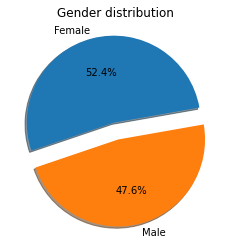

In [134]:
explode = (0.1, 0.1)
employees_data["gender"].value_counts().plot.pie(explode = explode,label="", autopct="%1.1f%%", shadow=True, startangle=10)
plt.title("Gender distribution")
plt.show()

<AxesSubplot:xlabel='home_office', ylabel='count'>

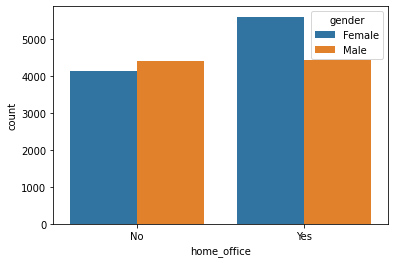

In [135]:
sns.countplot(x="home_office", hue="gender", data=employees_data)

<AxesSubplot:xlabel='company_type', ylabel='count'>

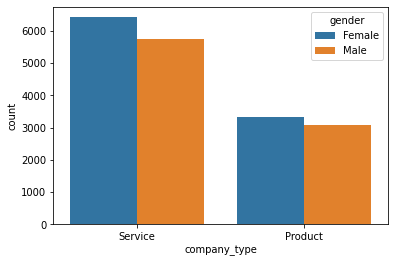

In [137]:
sns.countplot(data=employees_data,x="company_type", hue="gender")

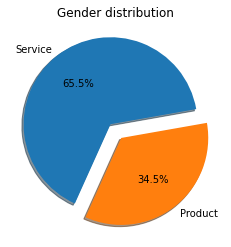

In [136]:
employees_data["company_type"].value_counts().plot.pie(explode = explode,label="", autopct="%1.1f%%", shadow=True, startangle=10)
plt.title("Gender distribution")
plt.show()

Text(0, 0.5, 'Count')

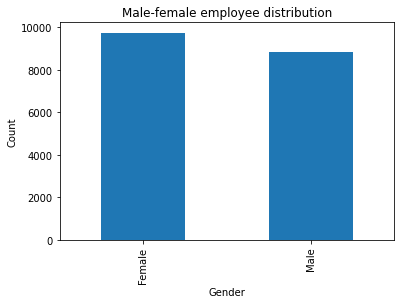

In [126]:
count_gender = employees_data['gender'].value_counts().plot(kind='bar',
                                    title="Male-female employee distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

We can clearly see in witch level in hierarchy system employees are. 

Text(0, 0.5, 'Count')

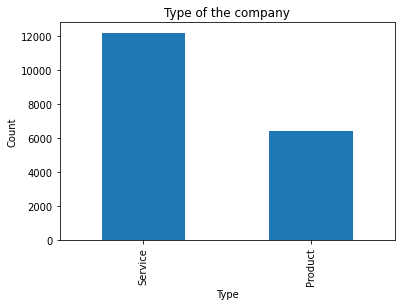

In [131]:
count_gender = employees_data['company_type'].value_counts().plot(kind='bar',
                                    title="Type of the company")
count_gender.set_xlabel("Type")
count_gender.set_ylabel("Count")

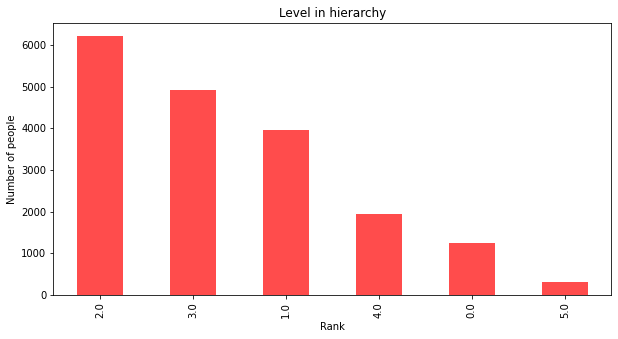

In [190]:
employees_data["designation"].value_counts().plot(kind="bar", figsize=(10,5), color='red', alpha=0.7)
plt.xlabel("Rank")
plt.ylabel("Number of people")
plt.title("Level in hierarchy")
plt.show()

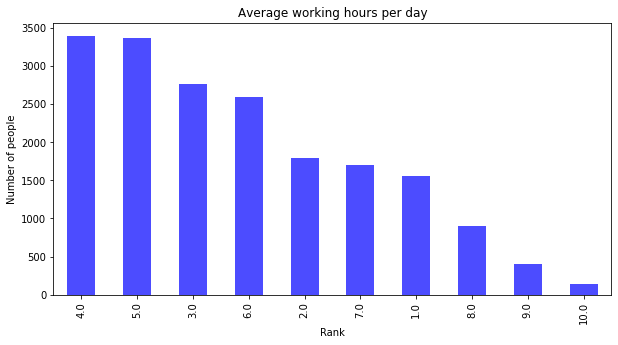

In [191]:
employees_data["working_hours"].value_counts().plot(kind="bar", figsize=(10,5), color='blue', alpha=0.7)
plt.xlabel("Hours")
plt.ylabel("Number of people")
plt.title("Аverage working hours per day")
plt.show()

We assume that our "designation" column indicates the level in the employee hierarchy. Bigger rank means bigger designation, the max is 5. As we can see in our database, people with rank 2 are the most (over 6000).

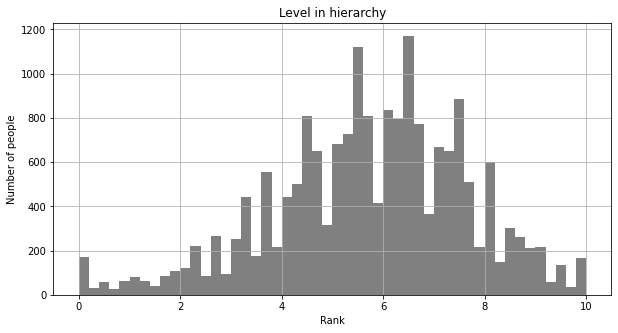

In [195]:
employees_data.hist(column='fatigue',bins=50, figsize=(10,5), color='gray', alpha=1)
plt.xlabel("Rank")
plt.ylabel("Number of people")
plt.title("Level in hierarchy")
plt.show()

Fatigue and burn rate will be visualized best with a bar chart in my opinion. The variability is big so I decide that 50 bins visualize the data best.

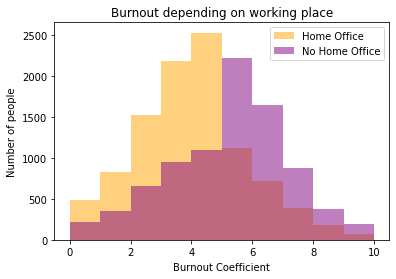

In [124]:
hf = employees_data[(employees_data["home_office"] == "Yes")]
nohf = employees_data[(employees_data["home_office"] == "No")]

plt.hist(hf["burn_rate"], alpha= .5,label = "Home Office", color = "orange")
plt.hist(nohf["burn_rate"], alpha= .5,label = "No Home Office", color = "purple")
plt.legend(loc="upper right")
plt.title("Burnout depending on working place")
plt.xlabel("Burnout Coefficient", labelpad = 5)
plt.ylabel("Number of people", labelpad = 5)
plt.show()

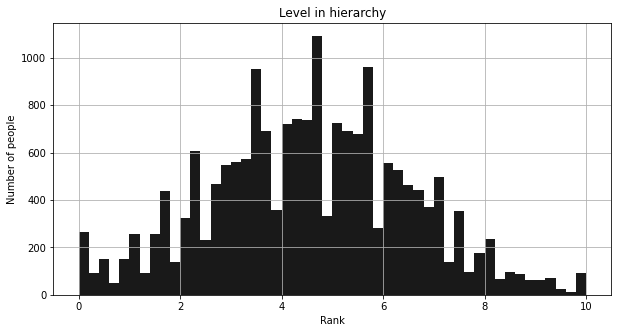

In [189]:
employees_data.hist(column='burn_rate',bins=50, figsize=(10,5), color='black', alpha=0.9)
plt.xlabel("Rank")
plt.ylabel("Number of people")
plt.title("Level in hierarchy")
plt.show()

From where should we start? The first thing that appears in my head is: Who has more working hours - man or woman?

In [121]:
employees_data[["gender", "working_hours"]].groupby("gender").agg("mean")

,working_hours
gender,
Female,4.211757
Male,4.789438


In [166]:
employees_data[["designation", "burn_rate"]].groupby("designation").agg("mean")

,burn_rate
designation,
0.0,1.513247
1.0,3.084750
2.0,4.364677
3.0,5.452419
4.0,6.870005
5.0,8.564669


In [ ]:
hf = employees_data[(employees_data["home_office"] == "Yes")]
nohf = employees_data[(employees_data["home_office"] == "No")]

plt.hist(hf["designation"], alpha= .5,label = "Home Office", color = "orange")
plt.hist(nohf["designation"], alpha= .5,label = "designation", color = "purple")
plt.legend(loc="upper right")
plt.title("Burnout depending on working place")
plt.xlabel("Burnout Coefficient", labelpad = 5)
plt.ylabel("Number of people", labelpad = 5)
plt.show()

In [125]:
stats.ttest_ind(hf["burn_rate"],nohf["burn_rate"])

Ttest_indResult(statistic=-44.00613323235249, pvalue=0.0)

This test checking if Burnrate depends on working place (home office or no home office). From the analysis above, working place dosn't imapct Burn out rate of the employees. 

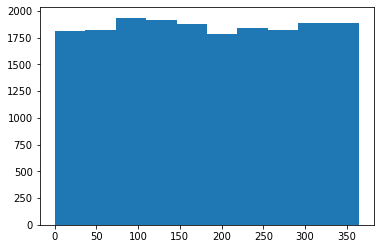

In [128]:
plt.hist(employees_data.experience)
plt.show()

In [129]:
employees_data["gender"].value_counts()

Female    9747
Male      8843
Name: gender, dtype: int64

In [130]:
len(employees_data[employees_data["gender"] == "Male"])/len(employees_data[employees_data["gender"] == "Female"])

0.9072535139017134

Although the gap is quite tiny, there are more female employees than male employees. The ratio of men to women is 0.91. Accordingly, there are 0.91 men for every single female.

An employee may work for either a service or product company, both are allowed. The number of employees in a company of the service type is almost double that of the product type.

In [132]:
employees_data["company_type"].value_counts()

Service    12174
Product     6416
Name: company_type, dtype: int64

In [133]:
len(employees_data[employees_data["company_type"] == "Service"])/len(employees_data[employees_data["company_type"] == "Product"])

1.8974438902743143

The two business types are service and product. Nearly twice as many people work for service-type companies as for product-type businesses.

## Data visualisation 

Lets start with speciality. I will visualisace data coulm per column in order to get acuainited with the parameters.

In [138]:
employees_data.describe()

,experience,designation,working_hours,fatigue,burn_rate
count,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000
mean,182.511081,2.179398,4.486552,5.732173,4.524443
std,105.285866,1.133148,2.044848,1.920547,1.978476
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,92.000000,1.000000,3.000000,4.600000,3.200000
50%,181.000000,2.000000,4.000000,5.900000,4.500000
75%,274.000000,3.000000,6.000000,7.100000,5.900000
max,365.000000,5.000000,10.000000,10.000000,10.000000


In [122]:
def calculate_correlation(dataframe, first_column, second_column):
    correlation = dataframe[first_column].corr(dataframe[first_column])
    return correlation

<AxesSubplot:>

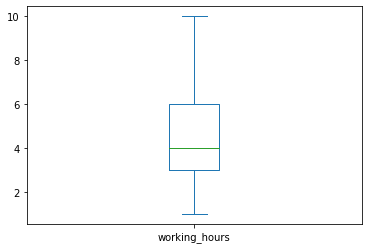

In [139]:
employees_data['working_hours'].plot(kind='box')

<AxesSubplot:>

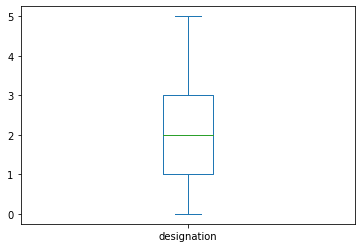

In [140]:
employees_data['designation'].plot(kind='box')

<AxesSubplot:>

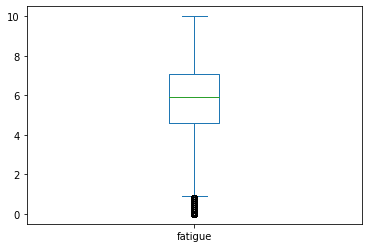

In [141]:
employees_data['fatigue'].plot(kind='box')

<AxesSubplot:>

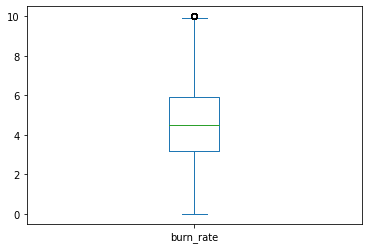

In [142]:
employees_data['burn_rate'].plot(kind='box')

In [143]:
def find_outliers(dataframe):
    lower_quartile = dataframe.quantile(0.25)
    upper_quartile = dataframe.quantile(0.75)
    interquartile_range = upper_quartile - lower_quartile
    lower_fence = lower_quartile - interquartile_range * 1.5
    upper_fence = upper_quartile + interquartile_range * 1.5
    outliers = []
    for i in dataframe:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

A measurement of statistical dispersion, or the spread of the data, is the interquartile range (IQR). The middle 50%, fourth spread, or H-spread are further names for the interquartile range. It is described as the discrepancy between the data's 75th and 25th percentiles. The data set is separated into quartiles, or four rank-ordered even sections, using linear interpolation to get the IQR. Q1 (also known as the lower quartile), Q2 (the median), and Q3 are used to identify these quartiles (also called the upper quartile).

In [144]:
outliers_fatigue = pd.DataFrame(find_outliers(employees_data['fatigue']))
outliers_burn_rate = pd.DataFrame(find_outliers(employees_data['burn_rate']))

total_outliers = len(outliers_fatigue) + len(outliers_burn_rate)
total_outliers

375

The total amount of outliears from 'burn_rate' and 'fatigue' is 375 employees. We can also delete them from our dataset, but in mu opinion this is going to be misstake. Differce between them and other employees is not that big and they will not gonna chage our study if we keep them.

<AxesSubplot:xlabel='designation', ylabel='working_hours'>

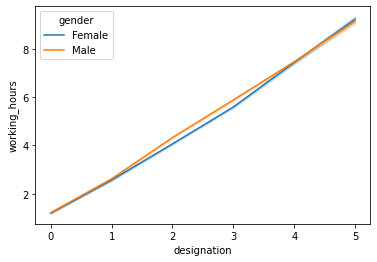

In [145]:
sns.lineplot(data=employees_data, x="designation", y="working_hours",hue="gender")

<AxesSubplot:xlabel='working_hours', ylabel='burn_rate'>

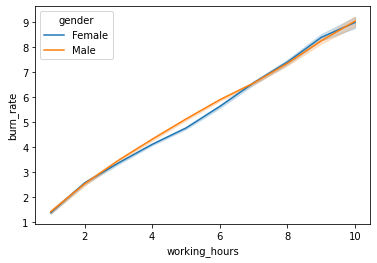

In [146]:
sns.lineplot(data=employees_data, x="working_hours", y="burn_rate",hue="gender")

<AxesSubplot:xlabel='working_hours', ylabel='fatigue'>

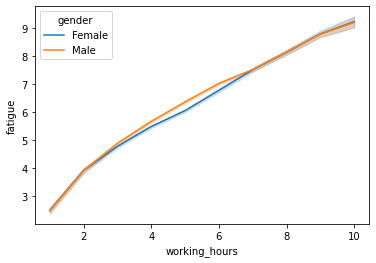

In [147]:
sns.lineplot(data=employees_data, x="working_hours", y="fatigue",hue="gender")

In [148]:
employees_data.corr()

,experience,designation,working_hours,fatigue,burn_rate
experience,1.000000,-0.002507,-0.002069,-0.000037,-0.000309
designation,-0.002507,1.000000,0.877893,0.691823,0.736412
working_hours,-0.002069,0.877893,1.000000,0.799563,0.855005
fatigue,-0.000037,0.691823,0.799563,1.000000,0.944389
burn_rate,-0.000309,0.736412,0.855005,0.944389,1.000000


<AxesSubplot:>

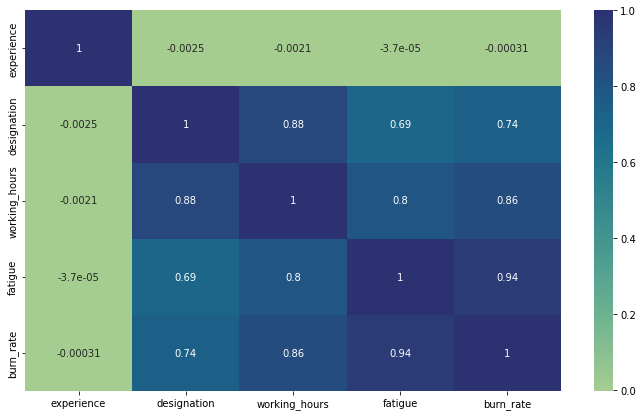

In [149]:
plt.figure(figsize=(12,7))
sns.heatmap(employees_data.corr(),annot=True, cmap='crest')

We can infer the values of Fatigue and Burn Rate from one another because of their strong correlation. However, because I'm worried about overfitting the output variable, I've decided to just choose to ignore the burn rate's missing values and fill in the exhaustion score using Sklearn's imputer.

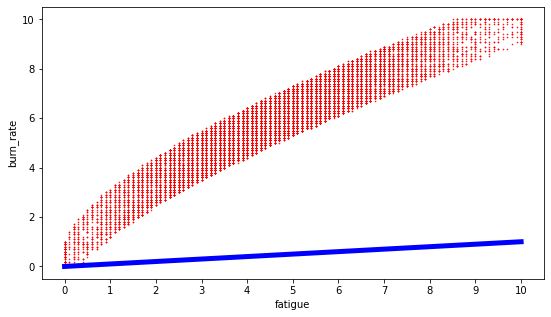

In [150]:
# We have very high correlation between some of the variables.
# Let's focus on "Mental Fatigue Score" and "Burn Rate"
plt.figure(figsize=(9, 5))
plt.scatter("burn_rate","fatigue",  data=employees_data, s=0.3, c="red")
plt.plot([0,10], [0, 1], linewidth=5, c="blue")
plt.xlabel("fatigue")
plt.ylabel("burn_rate")
plt.xticks(range(0,11))
plt.show()